In [13]:
import random
import uuid

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [6]:
def generate_random_point_in_polygon(polygon):
    """
    Generates a random latitude and longitude within a given polygon.
    Parameters:
    polygon (Polygon): The input polygon within which to generate the point.
    Returns:
    (float, float): A tuple of latitude and longitude of the random point within the polygon.
    """
    min_x, min_y, max_x, max_y = polygon.bounds
    while True:
        random_point = Point([np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)])
        if polygon.contains(random_point):
            return random_point.y, random_point.x


In [9]:
countries = gpd.read_file(file)
file = "/home/jalandet504/code/jalandet/lewagon-earthquake/earthquake-project/users/referential_countries.geojson"
users_per_country = 1


In [10]:
geom = countries[:1]["geometry"]


In [11]:
geom = countries["geometry"][countries["ADMIN"]=="South Africa"]


In [14]:
generate_random_point_in_polygon(geom)


ValueError: could not convert string to float: 'minx'

In [27]:
file = "/home/jalandet504/code/jalandet/lewagon-earthquake/earthquake-project/users/referential_countries.geojson"
users_per_country = 1
countries = gpd.read_file(file)
total_users = len(countries)*users_per_country

users_list = []
for x in range(len(countries)):
    random_country = random.choice(countries["ADMIN"])
    random_country_geometry = countries["geometry"][countries["ADMIN"]==random_country]
    print(random_country_geometry)
    for y in range(users_per_country):
        location = generate_random_point_in_polygon(random_country_geometry)
        print(location)
        users_list.append(
            {
                "uuid": uuid.uuid4(),
                "Country": random_country,
                "user_location": location
            }
        )

df_users = pd.DataFrame(users_list)


In [28]:
random_country_geometry


170    POLYGON ((81.77902 30.35804, 81.80150 30.36130...
Name: geometry, dtype: geometry

In [30]:
generate_random_point_in_polygon(random_country_geometry)


ValueError: could not convert string to float: 'minx'

In [ ]:
pd.DataFrame(df_users["user_location"].tolist(), index=df_users.index)
df_users[['latitude', 'longitude']] = pd.DataFrame(df_users["user_location"].tolist(), index=df_users.index)
df_users


In [ ]:
df_users.to_csv(f"/home/jalandet504/code/jalandet/lewagon-earthquake/earthquake-project/users/{total_users}_random_users.csv", sep=";")


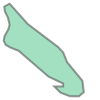

In [72]:
countries["geometry"][0]


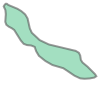

In [76]:
random.choice(countries["geometry"])


In [73]:
print(countries["geometry"][0])


POLYGON ((-69.99693762899992 12.577582098000036, -69.93639075399994 12.53172435100005, -69.92467200399994 12.519232489000046, -69.91576087099992 12.497015692000076, -69.88019771999984 12.453558661000045, -69.87682044199994 12.427394924000097, -69.88809160099993 12.417669989000046, -69.90880286399994 12.417792059000107, -69.93053137899989 12.425970770000035, -69.94513912699992 12.44037506700009, -69.92467200399994 12.44037506700009, -69.92467200399994 12.447211005000014, -69.95856686099992 12.463202216000099, -70.02765865799992 12.522935289000088, -70.04808508999989 12.53115469000008, -70.05809485599988 12.537176825000088, -70.06240800699987 12.546820380000057, -70.06037350199995 12.556952216000113, -70.0510961579999 12.574042059000064, -70.04873613199993 12.583726304000024, -70.05264238199993 12.600002346000053, -70.05964107999992 12.614243882000054, -70.06110592399997 12.625392971000068, -70.04873613199993 12.632147528000104, -70.00715084499987 12.5855166690001, -69.99693762899992 12.

In [74]:
generate_random_point_in_polygon(countries["geometry"][0])


(12.424707832388693, -69.89698895620903)